In [1]:
import json
import datetime
from matplotlib import pyplot as plt

import fb_fetch.fetch

In [2]:
with open('/home/michel/projects/desinfo/political-ads-scraper/data/graph_nb_ads_facebook.json', 'r') as f:
    graph_data = json.load(f)

/home/michel/.virtualenvs/desinfo/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


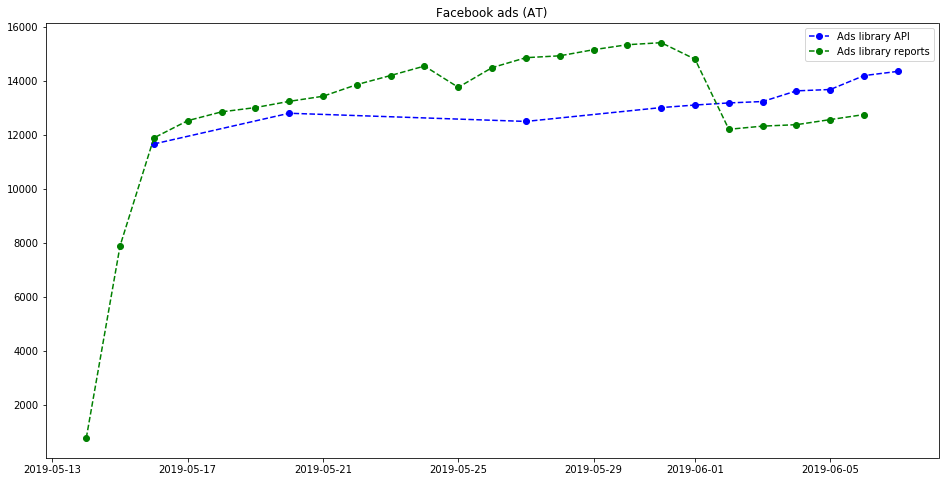

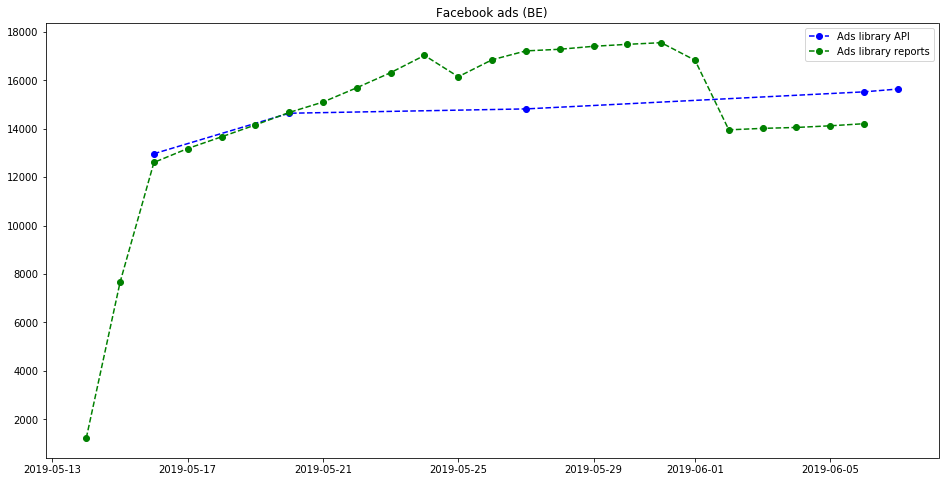

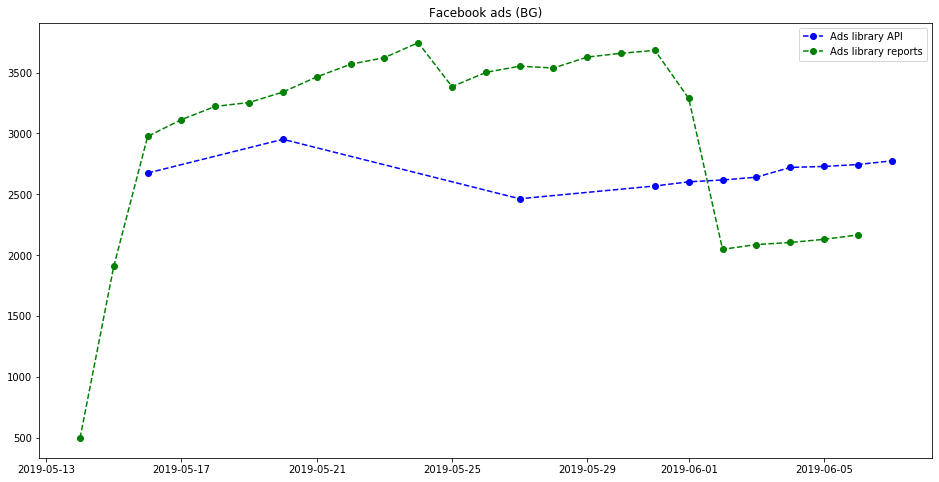

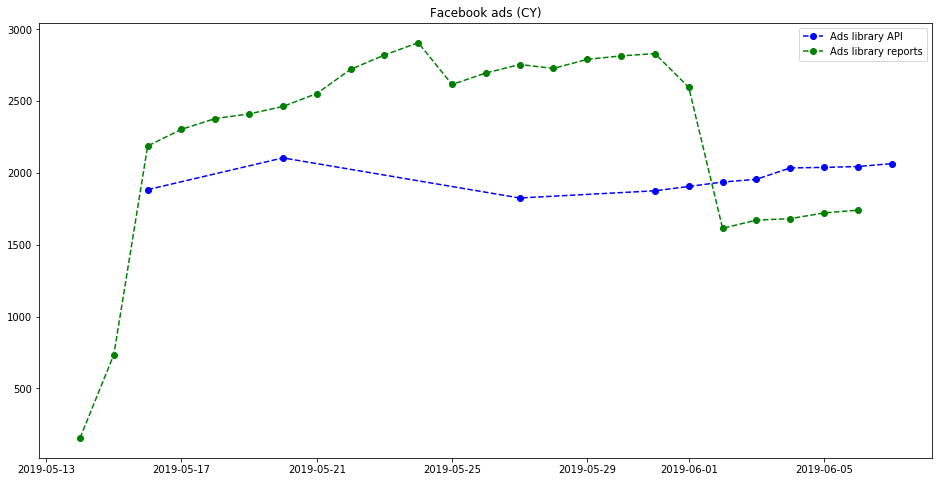

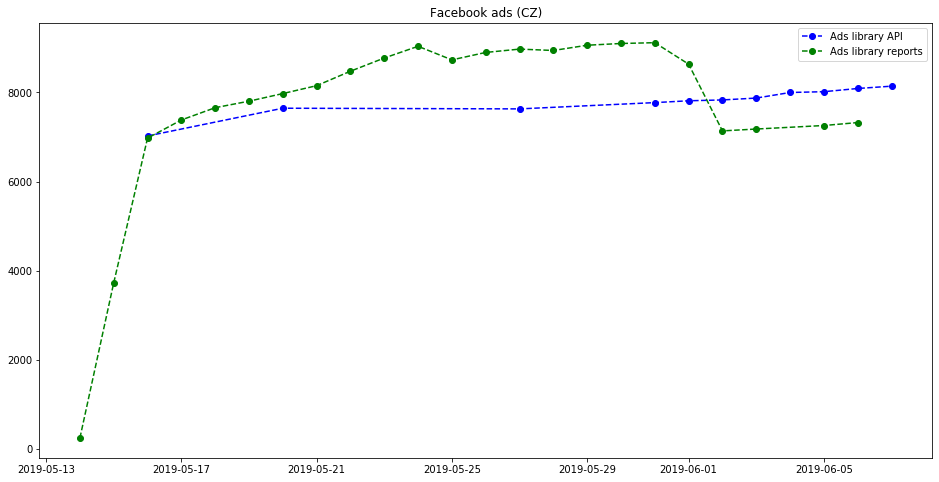

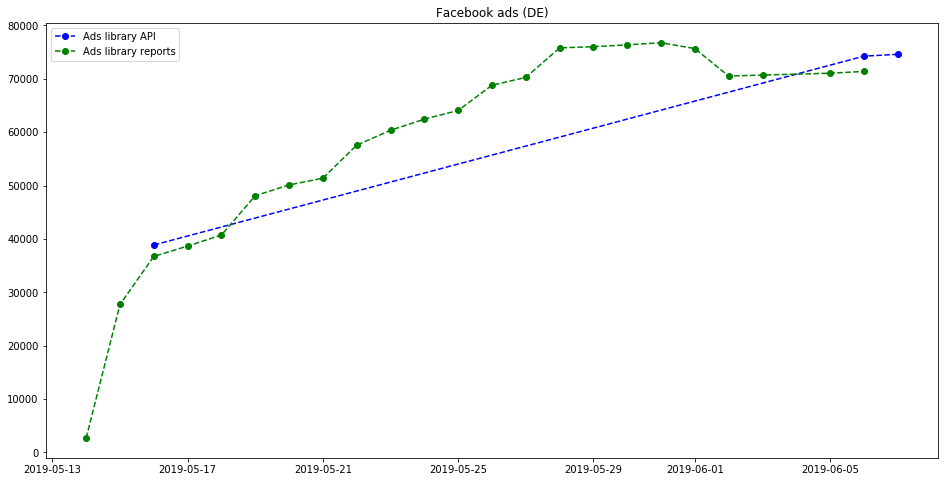

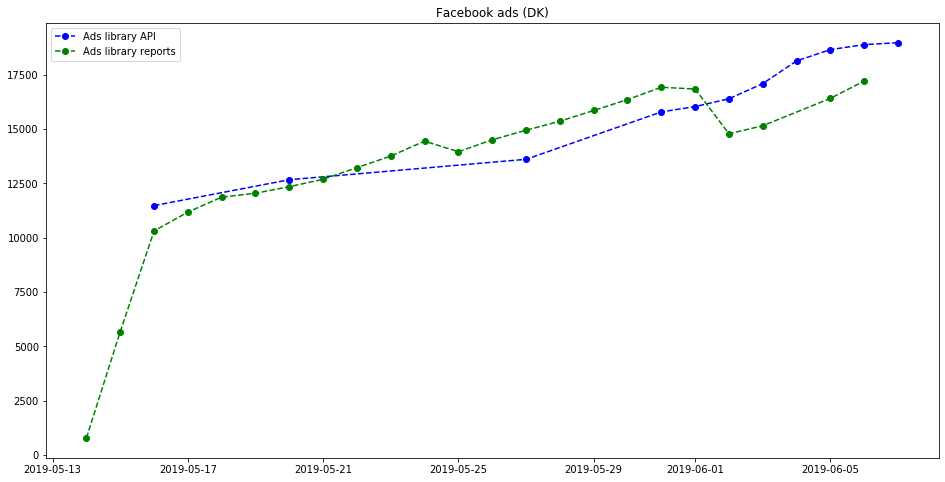

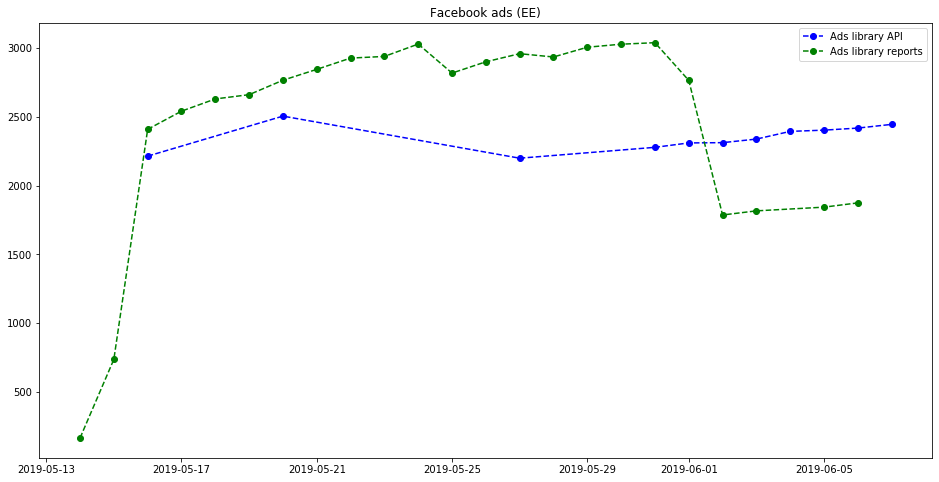

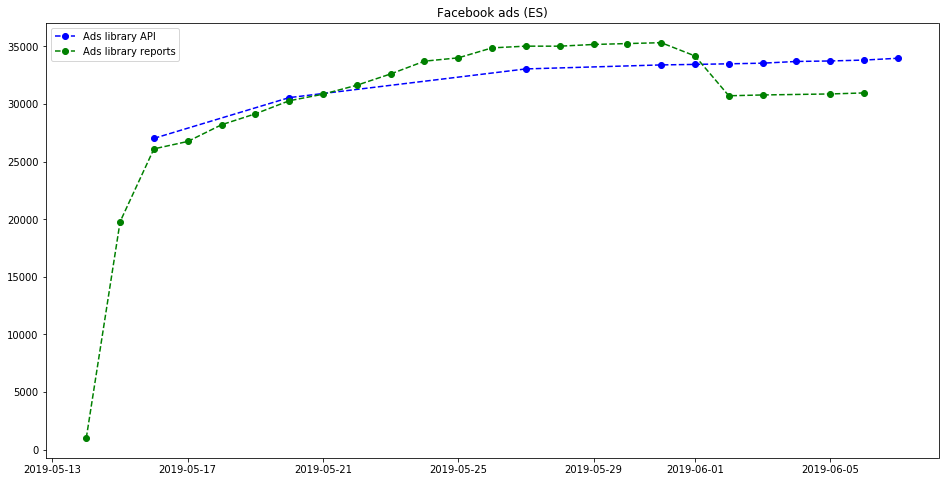

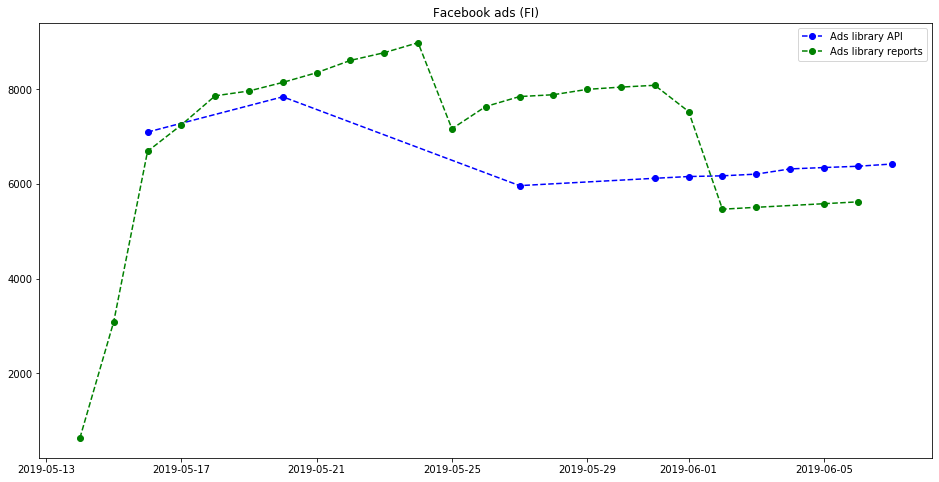

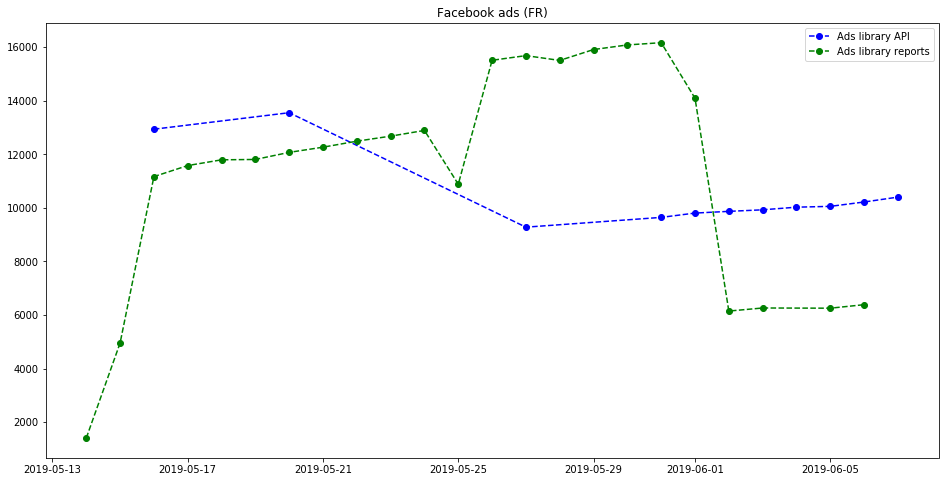

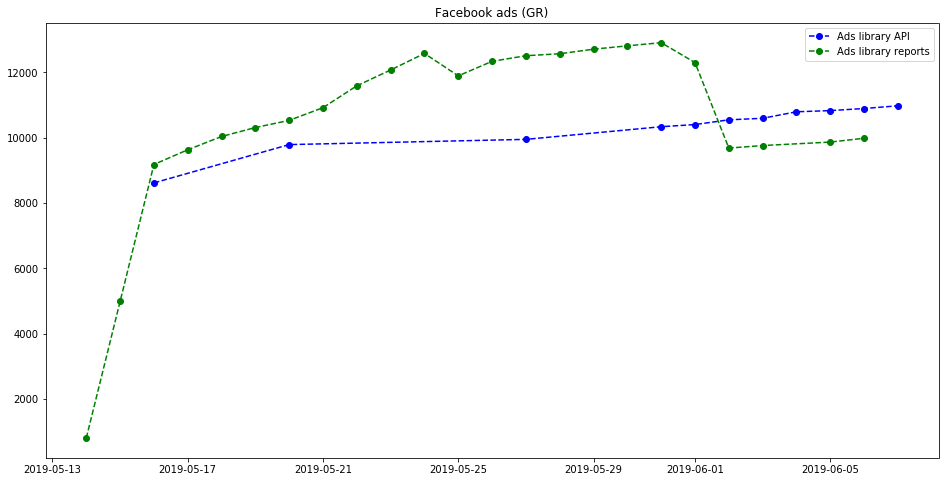

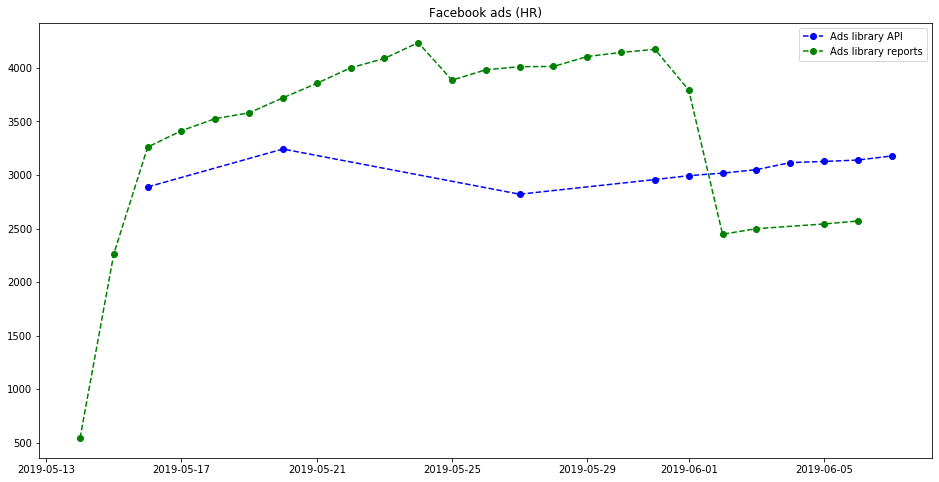

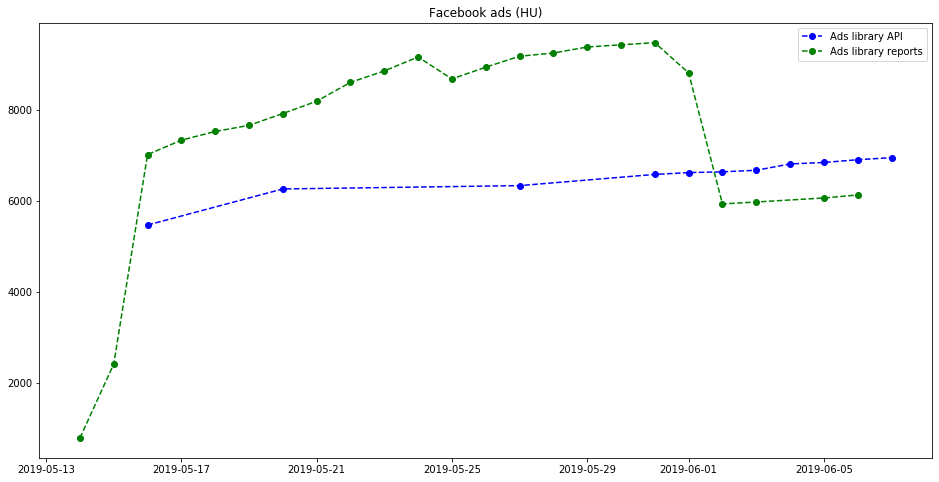

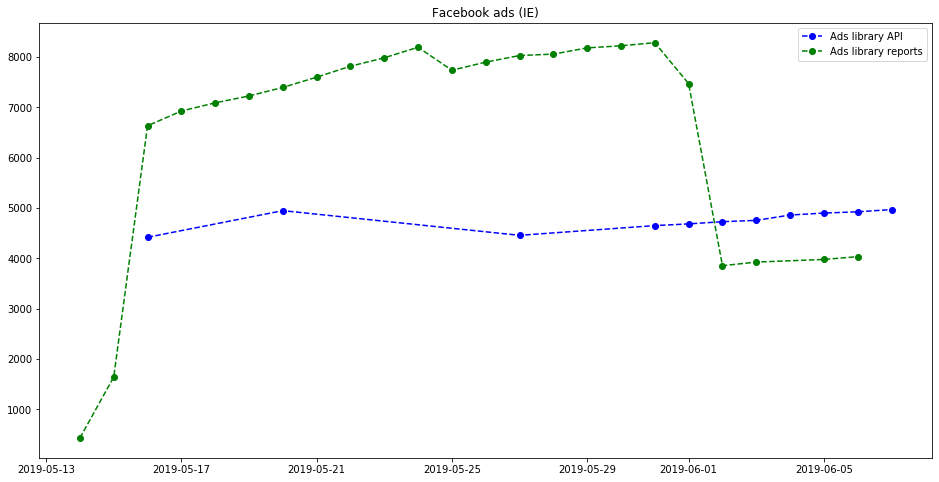

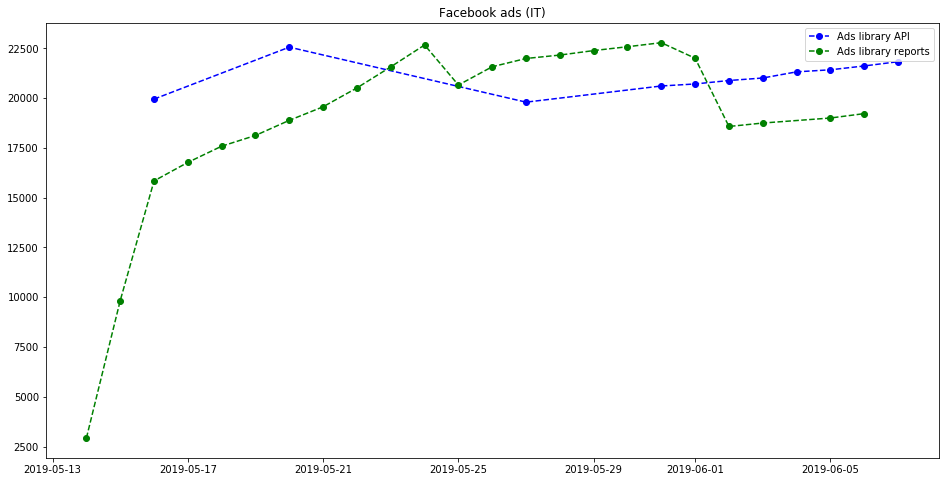

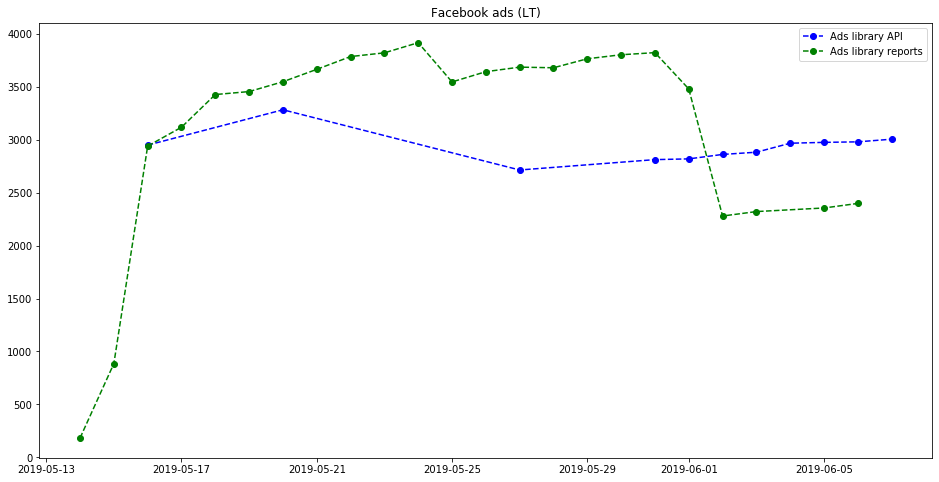

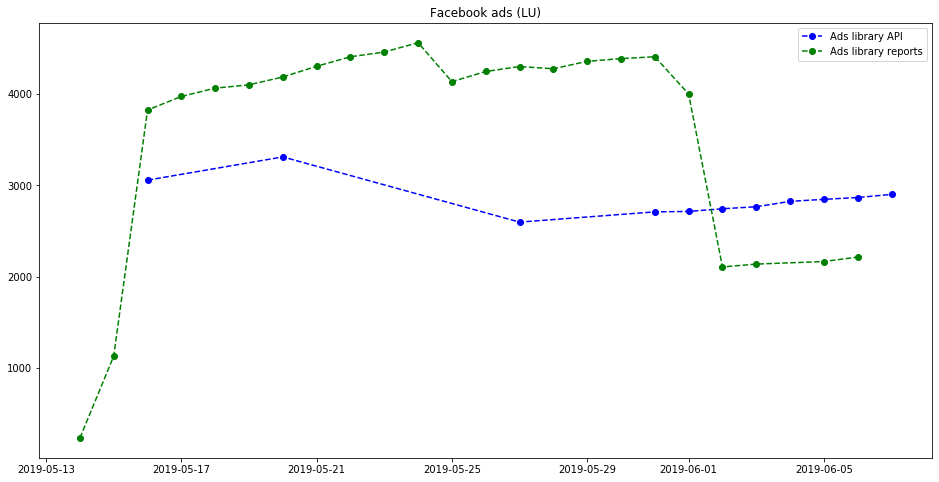

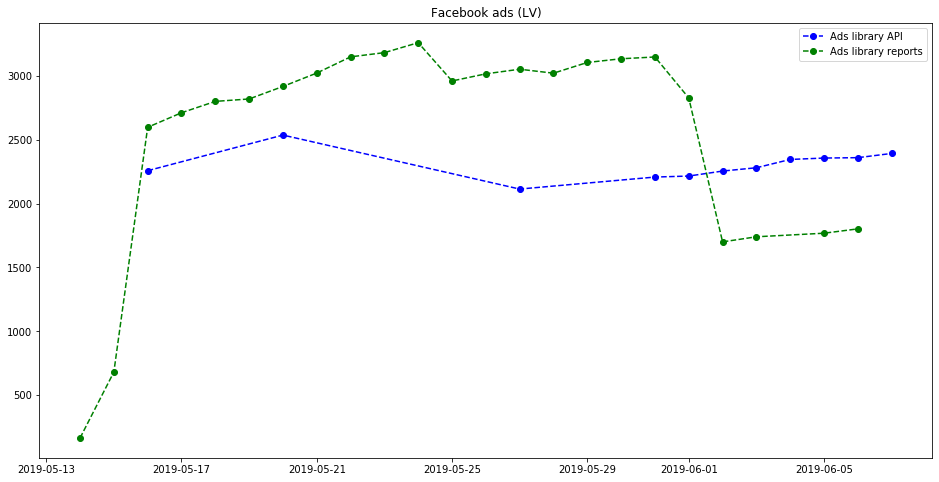

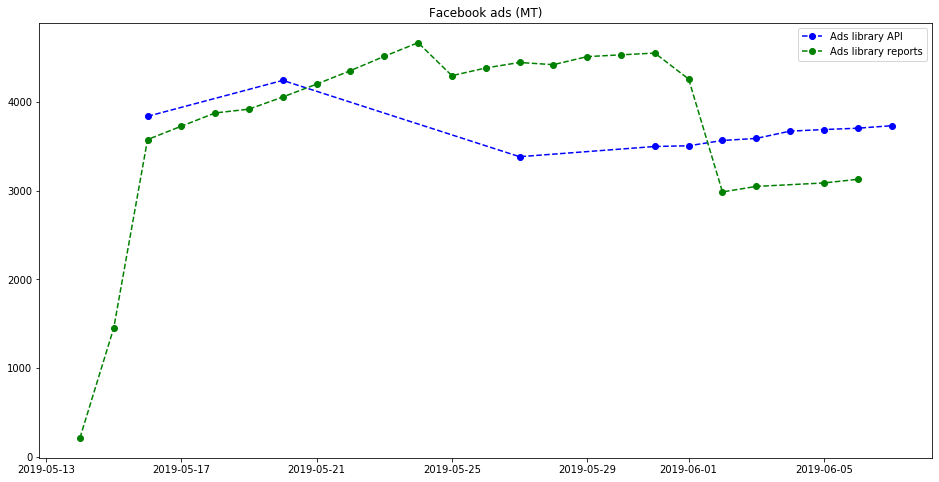

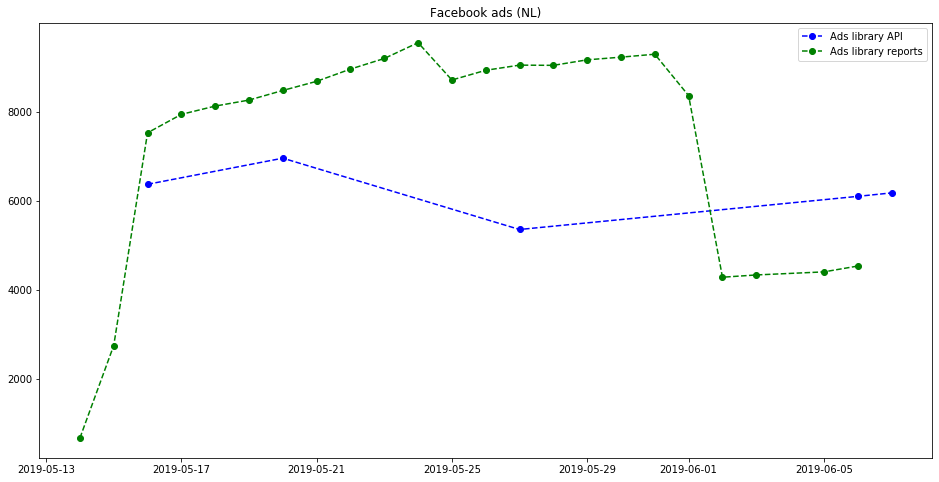

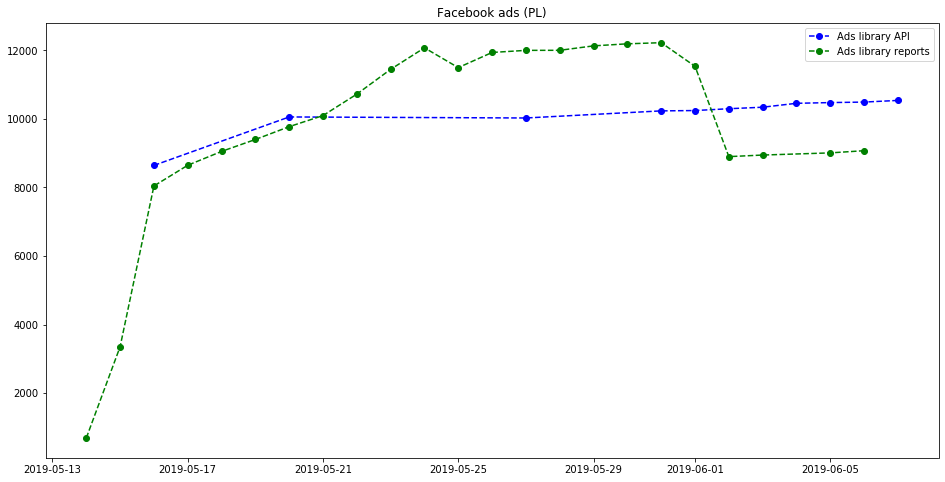

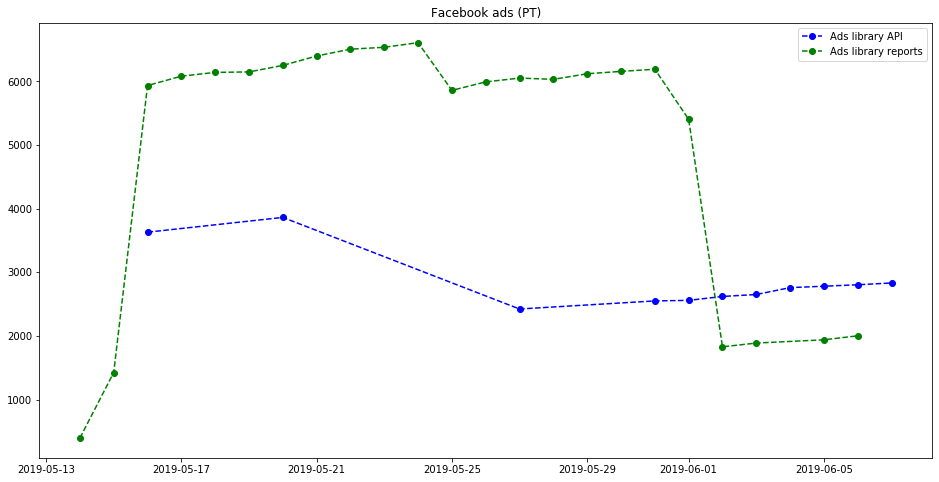

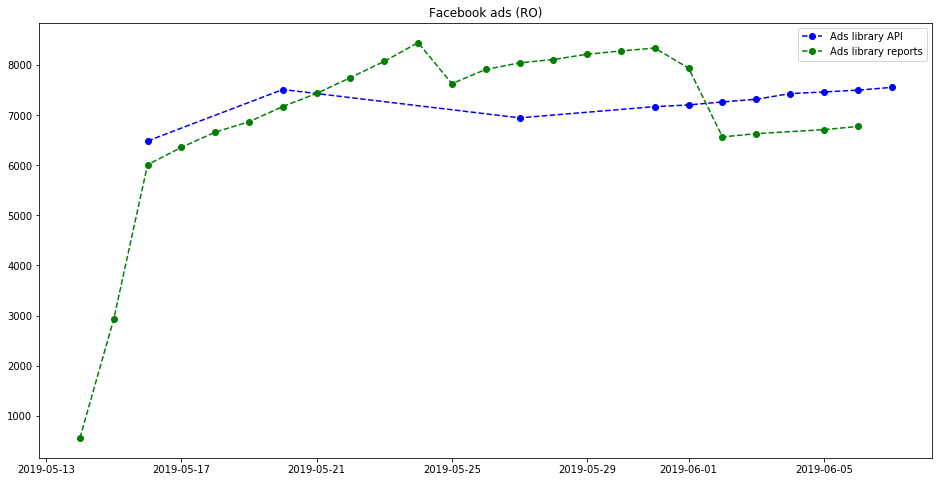

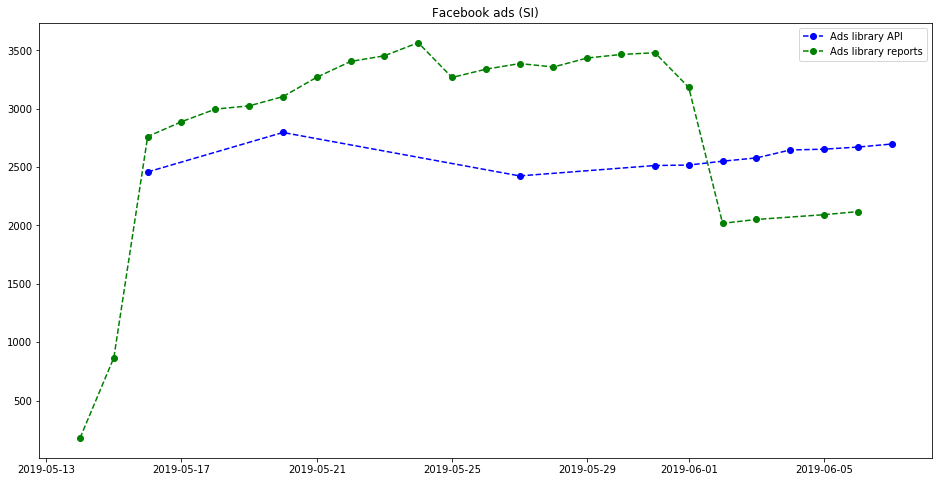

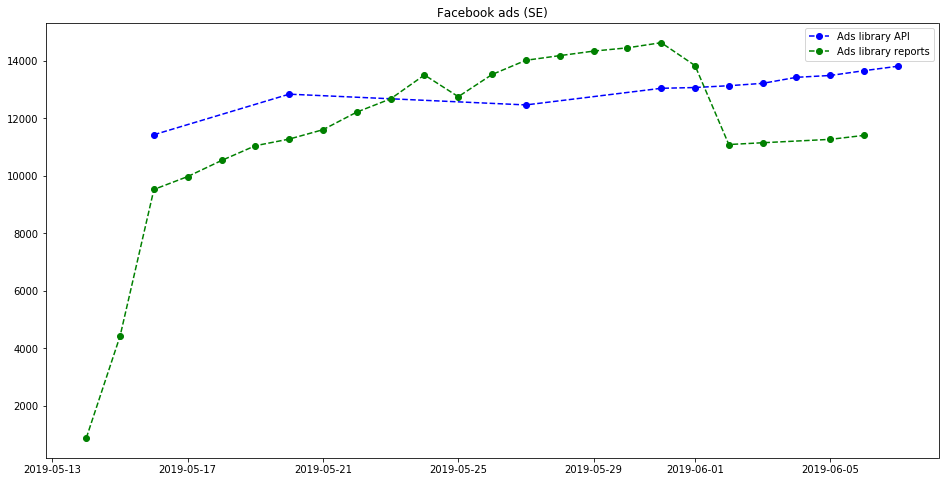

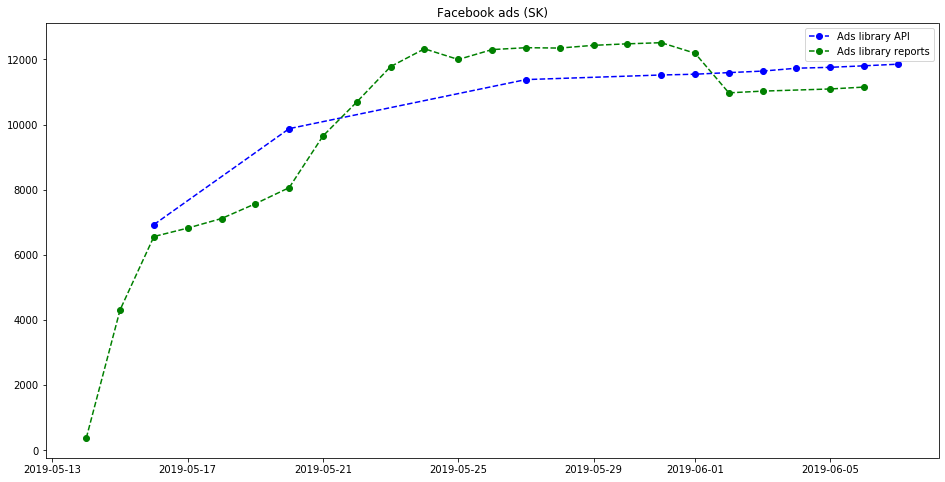

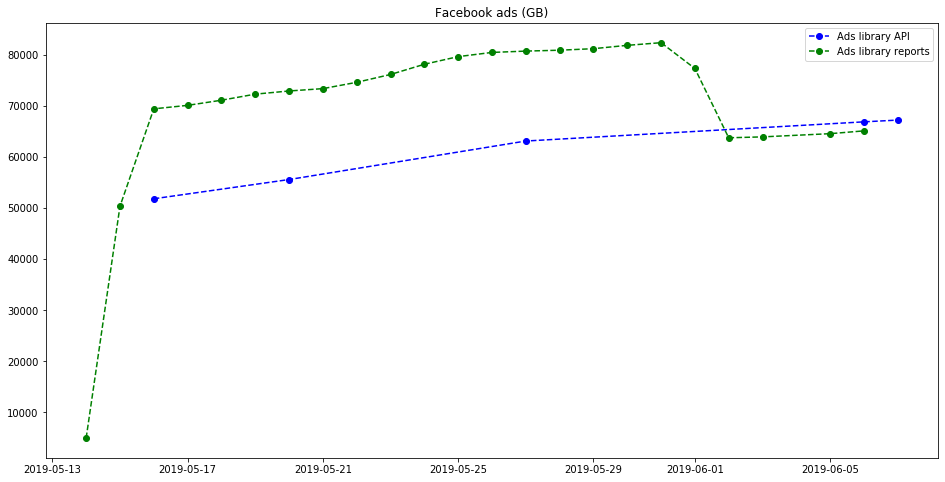

In [5]:
def remove_zeroes(d):
    return {
        k: v
        for k, v in d.items()
        if v
    }

for country in fb_fetch.fetch.COUNTRIES:
    
    country_code = country['code']

    data = graph_data[country_code]

    fig, ax = plt.subplots()

    plt.title('Facebook ads ({})'.format(country_code))


    time_series = data['API']
    dates = [
        datetime.date(*map(int, date_str.split('-')))
        for date_str, nb_ads in time_series.items()
    ]
    values = list(time_series.values())


    plt.plot(dates, values, color='blue', marker='o', linestyle='dashed', label='Ads library API')


    time_series = remove_zeroes(data['report'])
    dates = [
        datetime.date(*map(int, date_str.split('-')))
        for date_str, nb_ads in time_series.items()
    ]
    values = list(time_series.values())


    plt.plot(dates, values, color='green', marker='o', linestyle='dashed', label='Ads library reports')

    ax.legend()

    fig.set_size_inches(16, 8)
    plt.savefig('graph_facebook_ads_{}.png'.format(country_code), dpi=100)